In [1]:
# Random Forest Practical - Iris Dataset
# Author: Kheireddin Kadri

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [7]:
# --- Load Dataset ---
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [9]:
# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:

# --- Model Initialization ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# --- Predictions ---
y_pred = rf.predict(X_test)

In [12]:
# --- Evaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



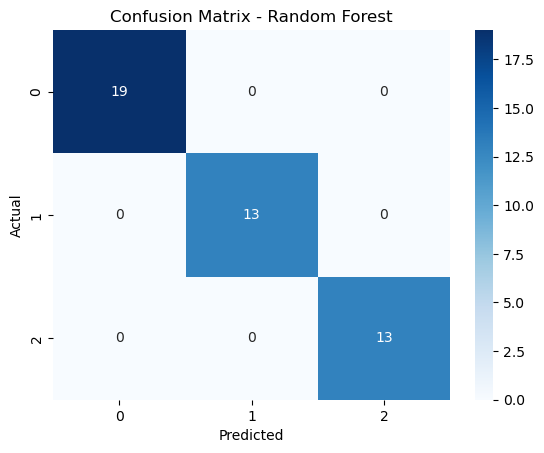

In [13]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



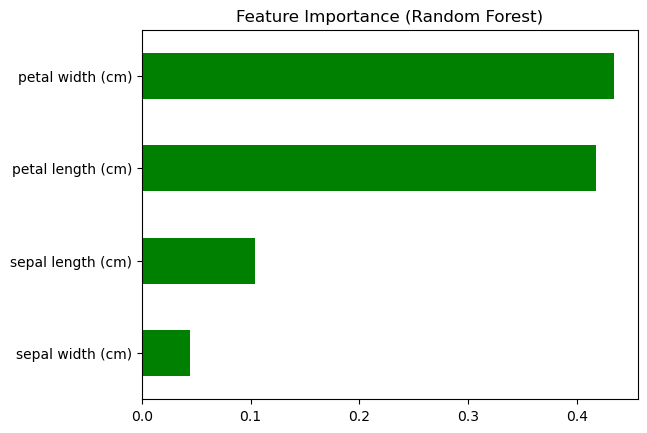

In [14]:
# --- Feature Importance ---
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='green')
plt.title("Feature Importance (Random Forest)")
plt.show()



In [15]:
# --- Hyperparameter Tuning Example ---
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 6, None],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 150}
Best Cross-Validation Score: 0.9428571428571428


### Visualization
* Single Tree Visualization

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



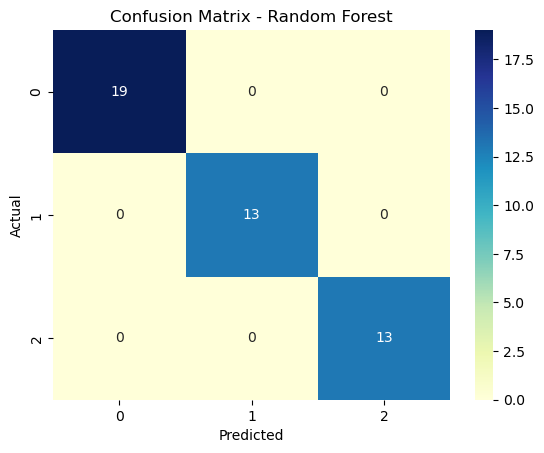

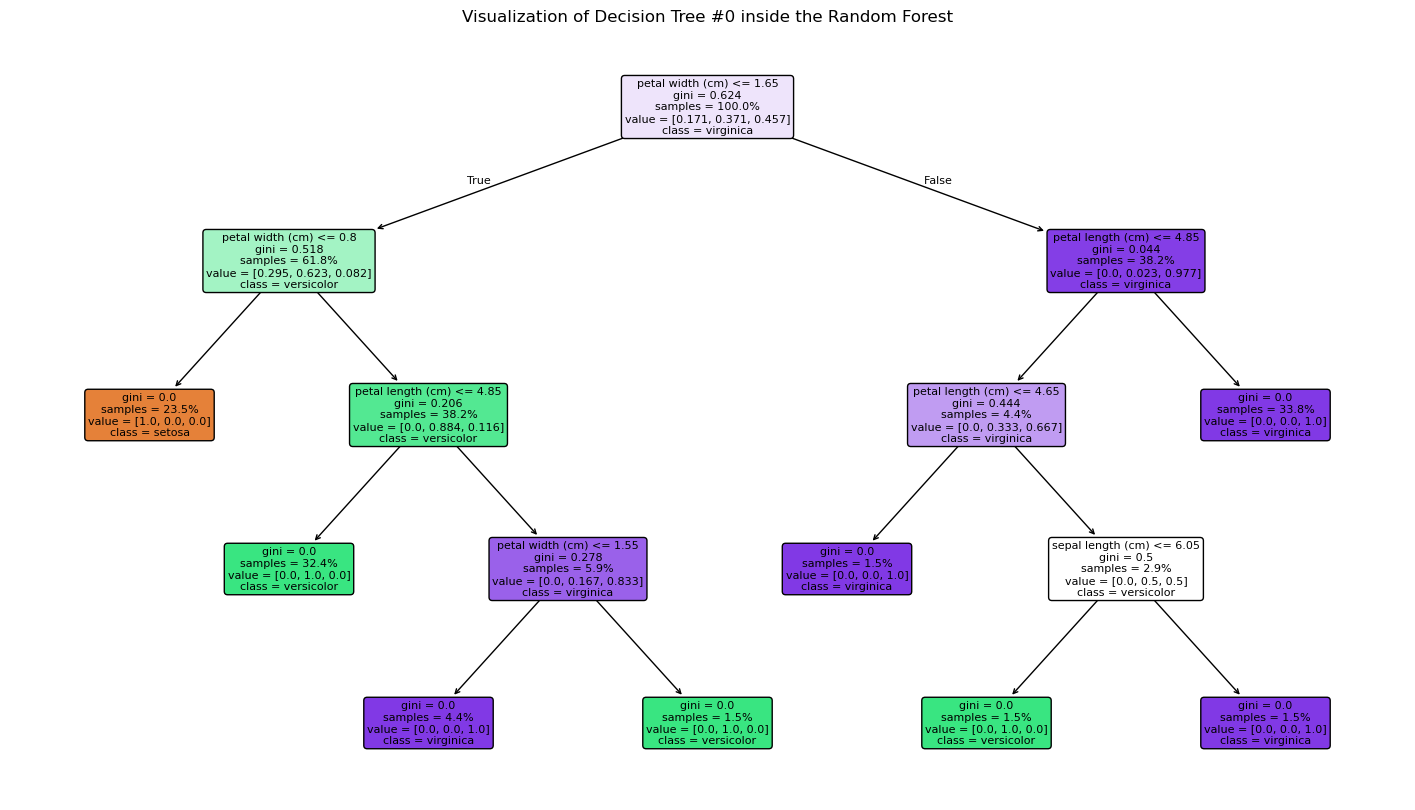

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- Load Dataset ---
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Model Initialization ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# --- Predictions ---
y_pred = rf.predict(X_test)

# --- Evaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================================================
# Visualize ONE Tree from the Random Forest
# ==========================================================
from sklearn import tree

plt.figure(figsize=(18,10))
tree_idx = 0  # choose any tree index
tree.plot_tree(rf.estimators_[tree_idx],
               filled=True,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               rounded=True,
               proportion=True,
               fontsize=8)
plt.title(f"Visualization of Decision Tree #{tree_idx} inside the Random Forest")
plt.show()



* Decision Boundary

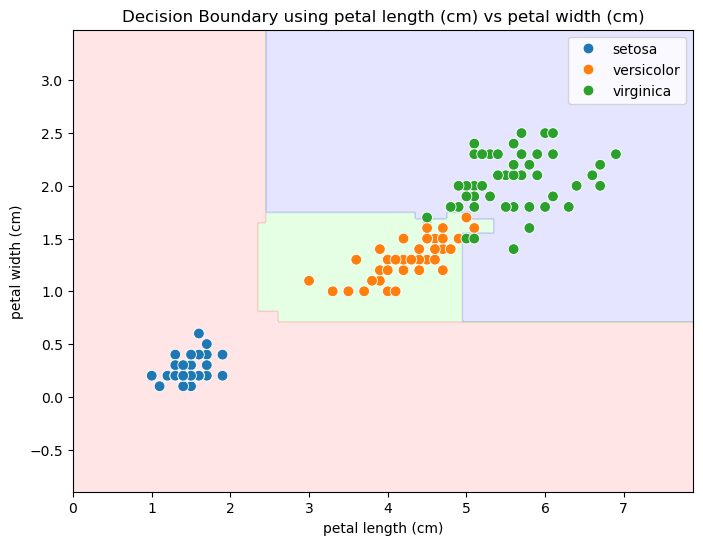

In [2]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, feature1, feature2):
    """Visualize the decision boundary for 2 features"""
    X_plot = X[[feature1, feature2]].values
    y_plot = y

    # Fit model with only 2 features
    model.fit(X_plot, y_plot)

    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"]))
    sns.scatterplot(x=X_plot[:,0], y=X_plot[:,1], hue=iris.target_names[y_plot], s=60)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f"Decision Boundary using {feature1} vs {feature2}")
    plt.show()

plot_decision_boundary(RandomForestClassifier(n_estimators=30, random_state=0),
                       X, y,
                       'petal length (cm)', 'petal width (cm)')



C:\Users\Kered\AppData\Local\Temp\ipykernel_5004\402210987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="crest")


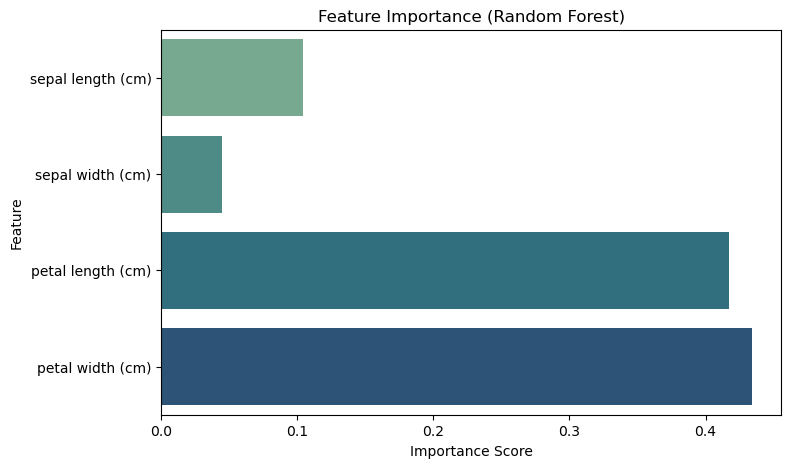


Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 150}
Best Cross-Validation Score: 0.9428571428571428


In [3]:
# ==========================================================
# 3. Enhanced Feature Importance Visualization
# ==========================================================
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="crest")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# ==========================================================
#  4. Hyperparameter Tuning Example (optional)
# ==========================================================
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 6, None],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
